### __Regression problem__

In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score

In [1]:
url_ = "https://raw.githubusercontent.com/olivierla412/Files/main/boston_house_rent.csv"

In [4]:
data =pd.read_csv(url_)

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [8]:
data.shape


(506, 14)

In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
## Finding the corretion between the features


corr = data.corr()
corr.shape

(14, 14)

#### __Let's plot the heatmap of correlation between features__

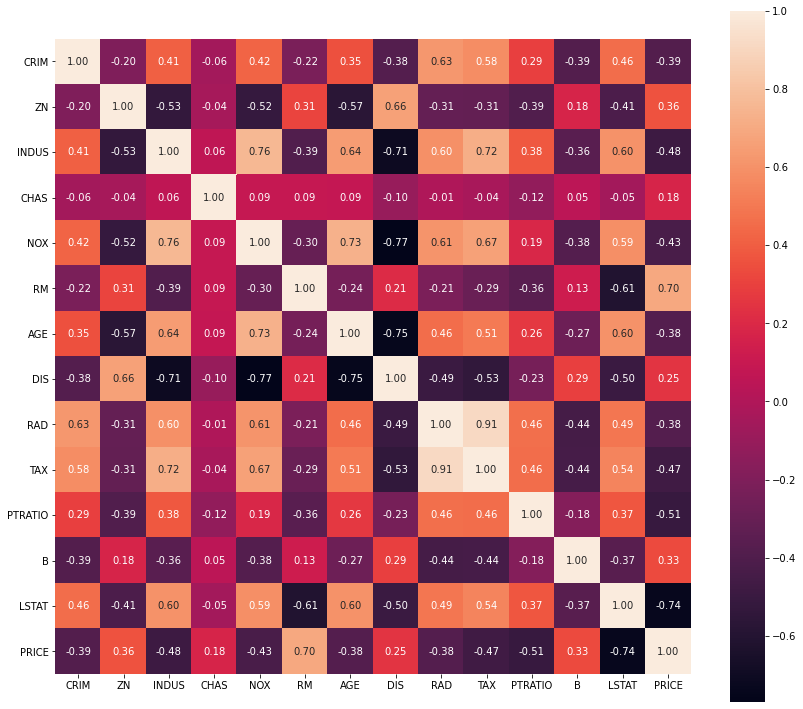

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar=True,square=True, cbar_kws={"shrink":.82},fmt=".2f",
            annot = True,annot_kws = {"size":10})
plt.tight_layout()

In [21]:
data["RAD"].value_counts()

### from the below output we can say that , there Ran column has categorical data

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

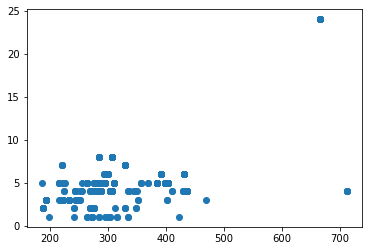

In [22]:
## let's plot the scatter plot
plt.scatter(data.TAX,data.RAD)
plt.show()

In [23]:
## from the above scatter plot we can say that there no linear relation b/w
## the both columns hence not multicollinearity.

In [28]:
x = data.drop('PRICE',axis=1)

In [29]:
y = data.PRICE

## AdaBoost model training

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
ada = AdaBoostRegressor()

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=200)

In [58]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [59]:
## Model prediction on the trained data

y_pred= ada.predict(x_train)

In [60]:
print('R square score',metrics.r2_score(y_train,y_pred))

R square score 0.9149181089737156


#### __let's plot the result__

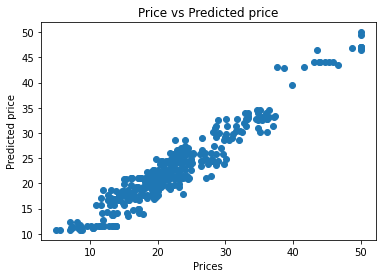

In [62]:
plt.scatter(y_train,y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted price')
plt.title('Price vs Predicted price')
plt.show()

## Hyperparameter Tuning using RandomizedSearchCV

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [64]:
dt = DecisionTreeRegressor()


In [68]:
params = {'n_estimators':[40,47,49,50],'learning_rate':[0.30,0.40,0.45]}

In [69]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(),cv =5,param_distributions = params)

In [70]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'n_estimators': [40, 47, 49, 50]})

In [77]:
## checking of the best estimators

rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=49)

In [72]:
ada = AdaBoostRegressor(base_estimator=dt,learning_rate=0.4,n_estimators=49)

In [73]:
ada.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.4,
                  n_estimators=49)

In [74]:
y_pred = ada.predict(x_test)

In [76]:
print('*****Accuracy post turning****\n')
print(metrics.r2_score(y_test,y_pred))

*****Accuracy post turning****

0.8868370136300706


### End of Ada Boosting